# 🛳️ Análisis Exploratorio de Datos (EDA) – Dataset Titanic de Seaborn

Este proyecto forma parte de mi serie de **proyectos personales de ciencia de datos**, cuyo objetivo es aplicar técnicas de análisis exploratorio para comprender mejor datasets reales y accesibles.

En este caso, utilizo el dataset `titanic` provisto por la librería `Seaborn`, que contiene información sobre los pasajeros del Titanic y su supervivencia, con el fin de explorar patrones y relaciones entre las variables.

## 📌 Objetivos del proyecto

- Cargar y explorar el dataset `titanic` de Seaborn
- Analizar la distribución de las variables principales
- Identificar relaciones significativas entre características y la variable objetivo (`survived`)
- Visualizar los datos de forma clara y efectiva usando `Seaborn` y `Matplotlib`

## 🧰 Herramientas utilizadas

- Python 3.12
- Pandas
- NumPy
- Matplotlib
- Seaborn

> 🔗 Repositorio en [GitHub](https://github.com/jFet1/Proyectos_personales)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## 📊 Medidas de tendencia central en variables numéricas

Antes de adentrarnos en el análisis profundo del dataset, es útil observar cómo se distribuyen algunas variables clave a través de sus **medidas de tendencia central**: **media**, **mediana** y **moda**.

Estas tres estadísticas nos permiten comprender la forma general de los datos y detectar posibles sesgos, asimetrías o valores atípicos.

En esta sección visualizamos la distribución de tres variables numéricas relevantes del dataset del Titanic:

- `age` (edad de los pasajeros)
- `fare` (costo del pasaje)
- `sibsp` (cantidad de familiares a bordo, hermanos/esposos)

En cada gráfico se destacan:
- **Moda**: línea naranja punteada
- **Media**: línea roja punteada
- **Mediana**: línea verde punteada


In [2]:
titanic_df = sns.load_dataset('titanic')
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


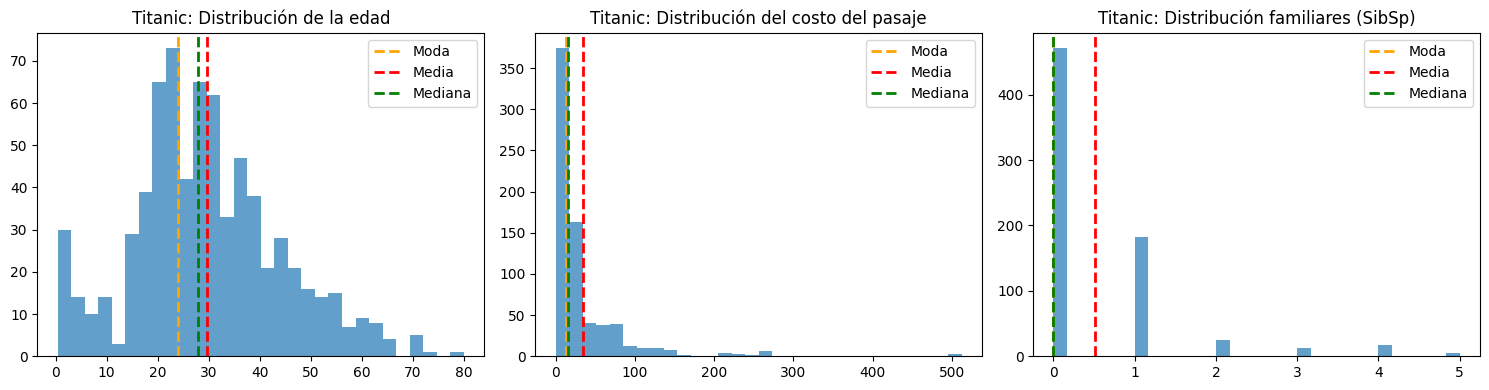

In [4]:
titanic_df_reduced = titanic_df[['age', 'fare', 'sibsp']].dropna()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Función para graficar
def plot_distribution(ax, data, title):
    ax.hist(data, bins=30, alpha=0.7) # dibujar histograma
    ax.axvline(data.mode()[0], color='orange', linestyle='dashed', linewidth=2, label='Moda') # dibujar la moda
    ax.axvline(data.mean(), color='red', linestyle='dashed', linewidth=2, label='Media') # dibujar la media
    ax.axvline(data.median(), color='green', linestyle='dashed', linewidth=2, label='Mediana') # dibujar la mediana
    ax.set_title(title)
    ax.legend()


plot_distribution(axes[0], titanic_df_reduced['age'], 'Titanic: Distribución de la edad')
plot_distribution(axes[1], titanic_df_reduced['fare'], 'Titanic: Distribución del costo del pasaje')
plot_distribution(axes[2], titanic_df_reduced['sibsp'], 'Titanic: Distribución familiares (SibSp)')

plt.tight_layout()
plt.show()

## 🧠 Conclusiones preliminares

- **Edad (`age`)**: presenta una distribución aproximadamente normal, aunque con una ligera asimetría hacia la derecha (cola larga de personas mayores). La moda está cerca de los 20 años, lo cual puede reflejar un gran número de jóvenes a bordo.
  
- **Costo del pasaje (`fare`)**: tiene una distribución altamente sesgada a la derecha, con muchos pasajeros que pagaron tarifas bajas y unos pocos que pagaron pasajes muy elevados. La media está claramente influenciada por estos valores extremos, alejándose mucho de la mediana y la moda.

- **Familiares a bordo (`sibsp`)**: está fuertemente concentrada en el valor 0, lo que indica que la mayoría de los pasajeros viajaban sin hermanos/as o esposos/as. La media es mayor que la mediana y la moda, lo que también refleja una distribución asimétrica.

Estas visualizaciones nos ayudan a identificar qué variables tienen distribuciones balanceadas y cuáles podrían necesitar transformaciones (como logaritmos) para futuros modelos predictivos.
